# Change of temp in March 2016

In [1]:
import os                                                                                                #整理模块
import numpy as np                                                                                       #向量化数组模块，加快运算
import datetime as dt                                                                                    #顾名思义，时间模块
import xarray as xr                                                                                      #三维数据组
import netCDF4                                                                                           #针对气象数据的数据格式
from netCDF4 import Dataset, num2date
import cartopy                                                                                           #地理绘图软件
import cartopy.crs as ccrs                                                                               #坐标参考系统
import cartopy.feature as cfeature                                                                       #地理特征
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER                                #经纬度
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))
import cmocean                                                                                            #色条
from matplotlib import pyplot as plt
# %config InlineBackend.figure_format = 'svg'
%matplotlib inline

libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory


In [2]:
# GBR1 HYDRO

for item in range(6):
    year = "201" + str(item+1)
    inputFile = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/monthly-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_monthly-monthly-" + year + "-03.nc"
    ncdata = xr.open_dataset(inputFile)
    temp = ncdata.temp.sel(latitude=slice(-15.0415,-14.3740),longitude=slice(145.1195, 145.80))
    temp.to_netcdf('tmpchange03'+ year +'.nc')
    print ("The data of 03/"+ year + "has been documented")

The data of 03/2011has been documented
The data of 03/2012has been documented
The data of 03/2013has been documented
The data of 03/2014has been documented
The data of 03/2015has been documented
The data of 03/2016has been documented


In [2]:
for item in range(6):
    year = "201" + str(item+1)
    locals()['TMP' + str(item+1)] = xr.open_dataset('tmpchange03'+ year +'.nc')

In [4]:
TMP5

<xarray.Dataset>
Dimensions:    (k: 17, time: 1, latitude: 22, longitude: 23)
Coordinates:
    zc         (k) float64 ...
  * time       (time) datetime64[ns] 2015-02-28T14:00:00
  * latitude   (latitude) float64 -15.02 -14.99 -14.96 ... -14.45 -14.42 -14.39
  * longitude  (longitude) float64 145.1 145.2 145.2 145.2 ... 145.7 145.8 145.8
Dimensions without coordinates: k
Data variables:
    temp       (time, k, latitude, longitude) float32 ...

In [3]:
selectedVariable = 'temp' 
selectedTimeIndex = 0        
selectedDepthIndex = -1        

In [4]:
tmpmeanmarch = (TMP1[selectedVariable][selectedTimeIndex, selectedDepthIndex, :,:]
                +TMP2[selectedVariable][selectedTimeIndex, selectedDepthIndex, :,:]
                +TMP3[selectedVariable][selectedTimeIndex, selectedDepthIndex, :,:]
                +TMP4[selectedVariable][selectedTimeIndex, selectedDepthIndex, :,:]
                +TMP5[selectedVariable][selectedTimeIndex, selectedDepthIndex, :,:]
                +TMP6[selectedVariable][selectedTimeIndex, selectedDepthIndex, :,:])/6

In [5]:
tmp1603relative = TMP6[selectedVariable][selectedTimeIndex, selectedDepthIndex, :,:] - tmpmeanmarch

In [6]:
print('Data range: ')
print(np.nanmin(tmpmeanmarch),
      np.nanmax(tmpmeanmarch))

Data range: 
28.943155 29.700577


In [7]:
print('Data range: ')
print(np.nanmin(tmp1603relative),
      np.nanmax(tmp1603relative))

Data range: 
1.0785027 1.3745804


In [8]:
# Used color
color = cmocean.cm.matter

# Variable range for the colorscale based on the range shown above
curlvl = [1.07,1.38]

# Vector field mapping information
veclenght = 1.
vecsample = 50

# Figure size
size = (9, 10)


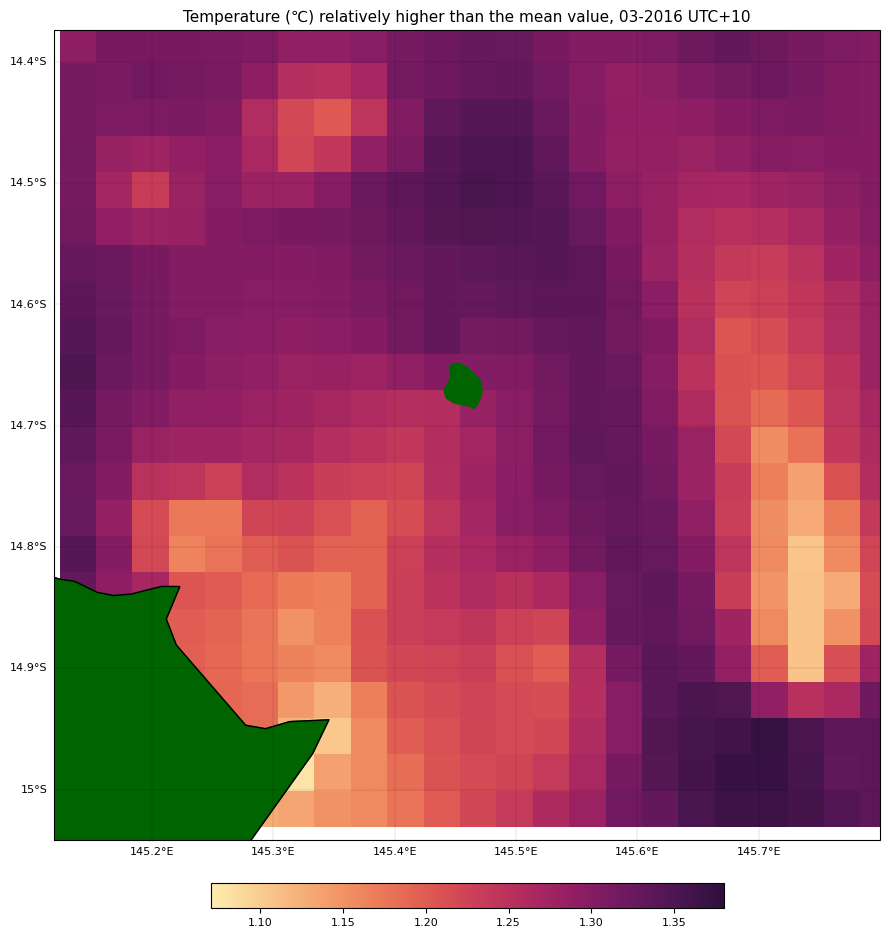

<Figure size 640x480 with 0 Axes>

In [9]:
# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([145.1195, 145.80, -15.0415, -14.3740], ccrs.PlateCarree())

# Ok now the map
lon = TMP1.longitude.values
lat = TMP1.latitude.values
data = tmp1603relative
cf = plt.pcolormesh(lon, lat, data, cmap=color, shading='auto',
                    vmin = curlvl[0], vmax = curlvl[1],
                    transform=ccrs.PlateCarree())

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
# cbar.set_label(ncdata[selectedVariable].units, rotation=0, 
#                labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
#dtime = netCDF4.num2date(time_var[selectedTimeIndex],time_var.units)
#daystr = dtime.strftime('%Y-%b-%d %H:%M')
plt.title('Temperature (℃) relatively higher than the mean value, %s UTC+10' % ("03-2016"), 
          fontsize=11);

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='darkgreen'))
ax.coastlines(linewidth=1)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()